In [46]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:

df = pd.read_csv('Iris.csv', index_col='Id')
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.rename({'SepalLengthCm': 'sepal_length',
           'SepalWidthCm': 'sepal_width',
           'PetalLengthCm': 'petal_length',
           'PetalWidthCm': 'petal_width',
           'Species': 'species'
          }, inplace=True,axis=1)
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
Id,,,,,
106,7.6,3.0,6.6,2.1,Iris-virginica
86,6.0,3.4,4.5,1.6,Iris-versicolor
2,4.9,3.0,1.4,0.2,Iris-setosa
96,5.7,3.0,4.2,1.2,Iris-versicolor
67,5.6,3.0,4.5,1.5,Iris-versicolor


In [6]:
x = df.groupby('species').median()
x

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [7]:
stats = df.describe()
stats

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
stats.loc['range'] = stats.loc['max'] - stats.loc['min']
new_df = stats.loc[['mean', 'range', '25%', '50%', '75%']]
new_df.rename({'50%': 'median'}, inplace=True)
new_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
range,3.600000,2.400,5.900000,2.400000
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000


In [9]:
df.groupby('species').agg(['mean', 'median'])
df.groupby('species').agg([np.mean, np.median])

sepal_length        sepal_width        petal_length         \
                        mean median        mean median         mean median   
species                                                                      
Iris-setosa            5.006    5.0       3.418    3.4        1.464   1.50   
Iris-versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Iris-virginica         6.588    6.5       2.974    3.0        5.552   5.55   

                petal_width         
                       mean median  
species                             
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

In [10]:
agg_dict={field: ['mean', 'median'] for  field in df.columns.tolist() if field != 'species'}
agg_dict['petal_length'] = 'max'
df.groupby('species').agg(agg_dict)

sepal_length        sepal_width        petal_length  \
                        mean median        mean median          max   
species                                                               
Iris-setosa            5.006    5.0       3.418    3.4          1.9   
Iris-versicolor        5.936    5.9       2.770    2.8          5.1   
Iris-virginica         6.588    6.5       2.974    3.0          6.9   

                petal_width         
                       mean median  
species                             
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0.5, 1.0, 'Distribution of petal-width')

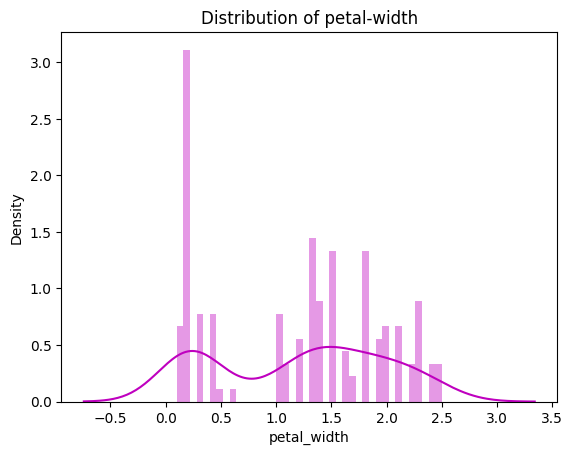

In [12]:
sns.distplot(a=df['petal_width'], bins=40, color='m')
plt.title('Distribution of petal-width')

<Axes: xlabel='species', ylabel='count'>

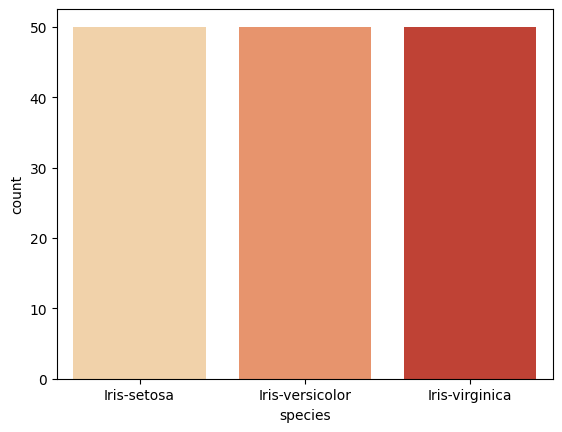

In [13]:
sns.countplot(x='species',data=df, palette="OrRd")

<Axes: xlabel='species', ylabel='sepal_width'>

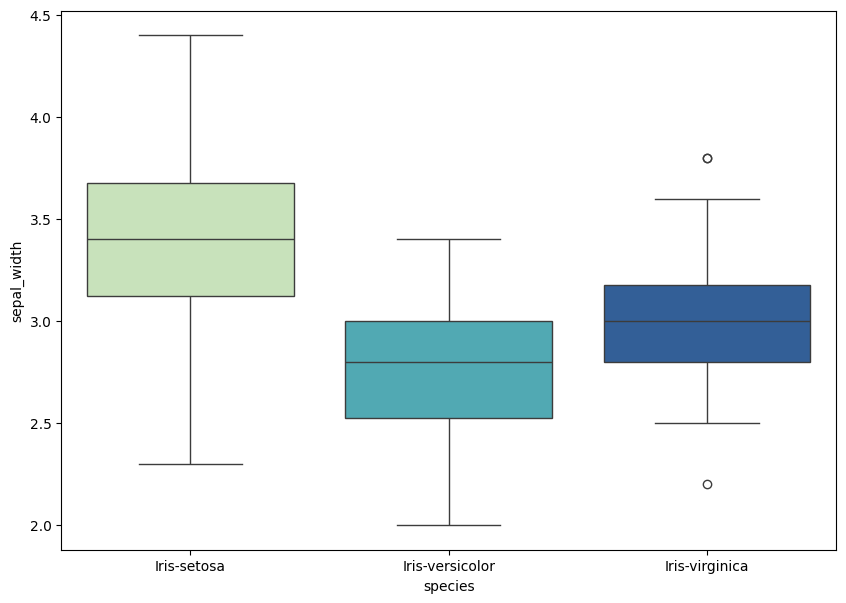

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(x='species',y='sepal_width',data=df ,palette='YlGnBu')

<Axes: xlabel='species', ylabel='petal_length'>

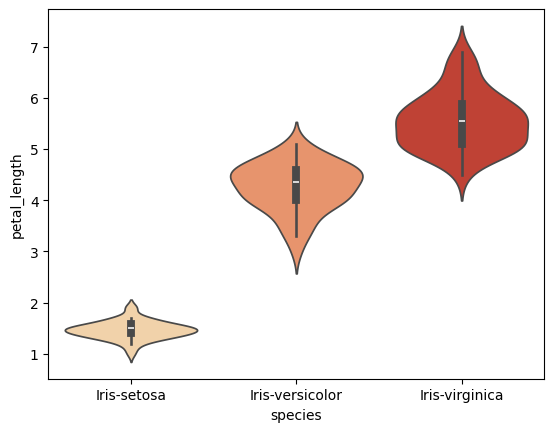

In [15]:
sns.violinplot(x='species', y='petal_length', data=df, palette='OrRd')

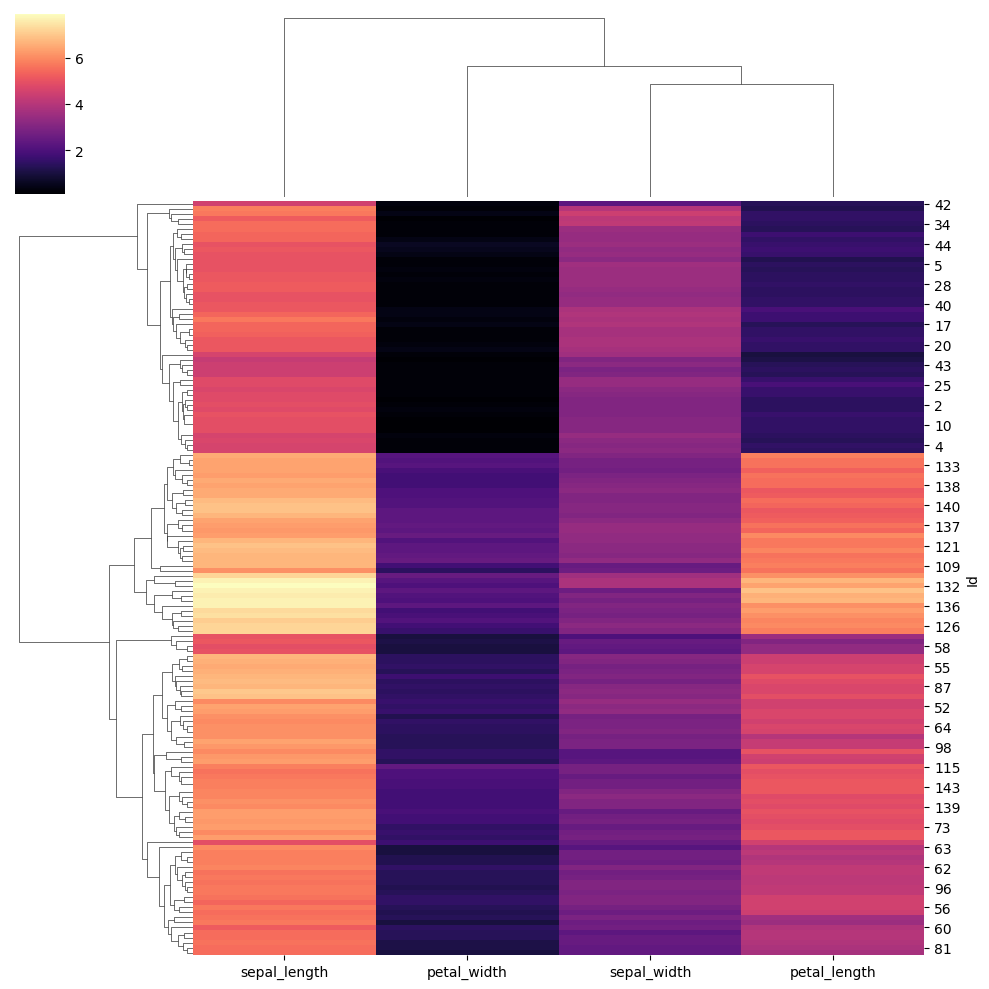

In [18]:
x = df.drop('species',axis=1)
g = sns.clustermap(x, cmap="magma")

<Axes: xlabel='petal_width', ylabel='petal_length'>

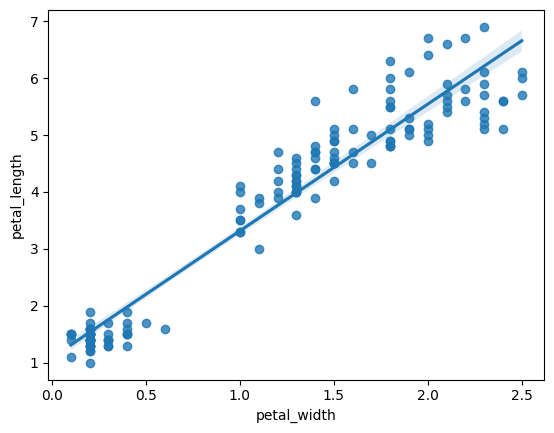

In [19]:
sns.regplot(x='petal_width', y='petal_length', data=df)

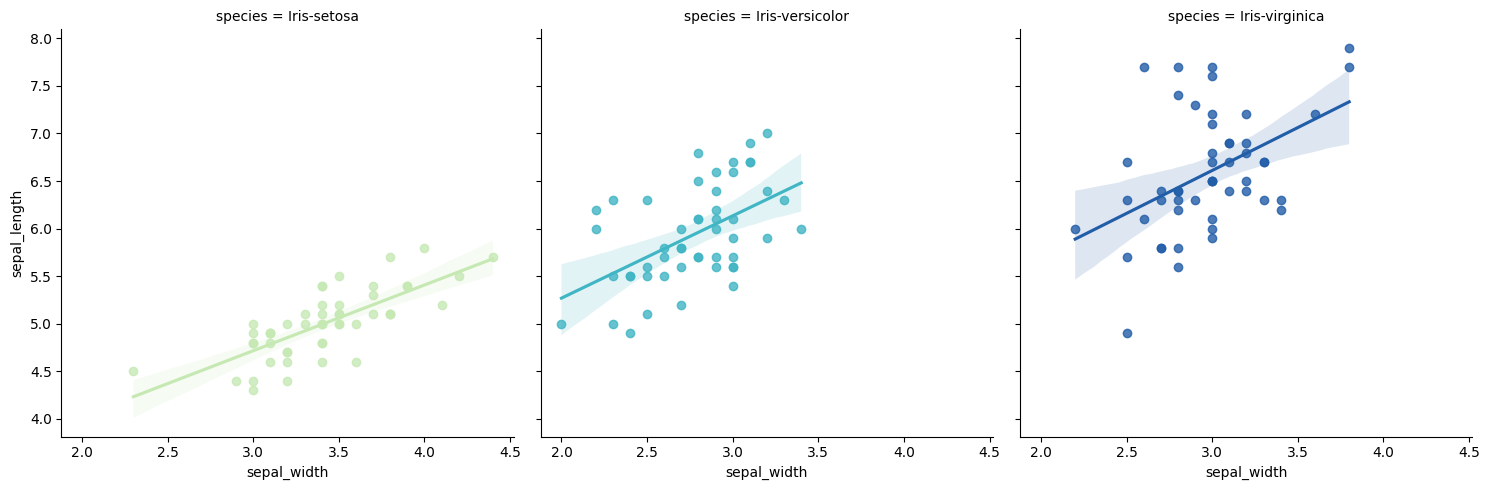

In [20]:
sns.lmplot(x = 'sepal_width', y = 'sepal_length', data = df, col = 'species', hue = 'species', palette = 'YlGnBu')

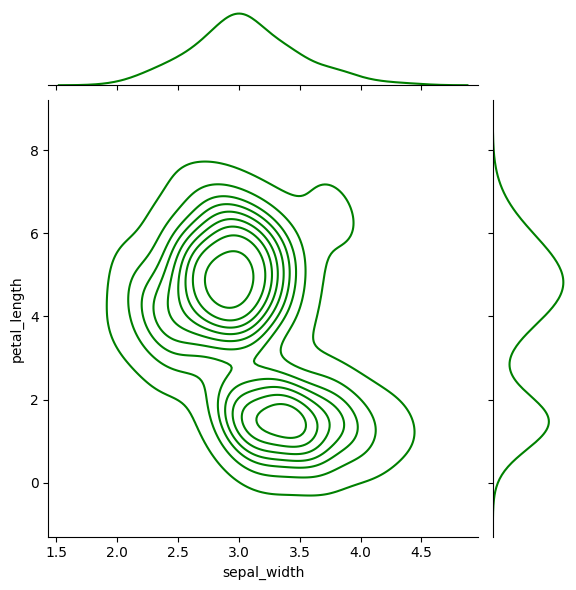

In [21]:
sns.jointplot(x="sepal_width", y="petal_length", data=df, kind="kde", color="g")

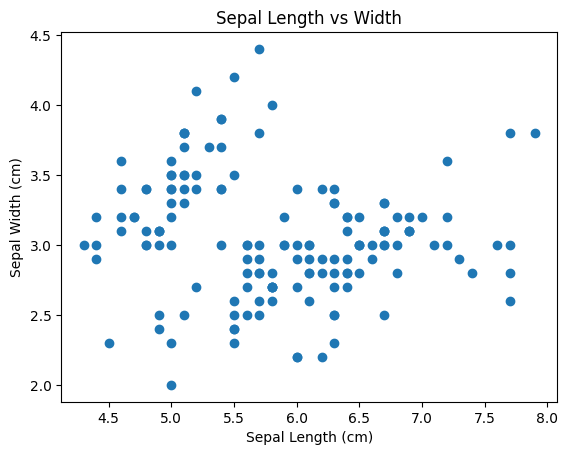

In [22]:
ax = plt.axes()

ax.scatter(df.sepal_length, df.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');

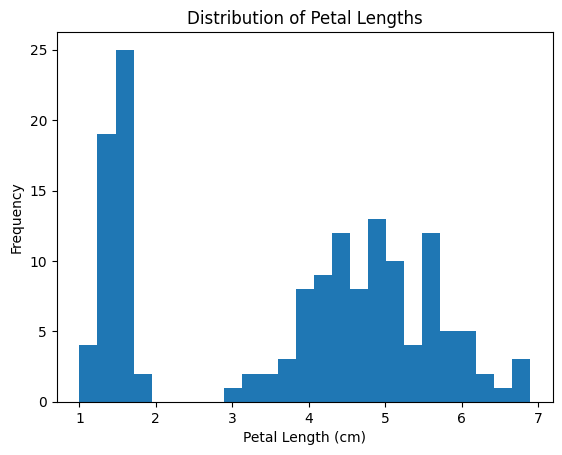

In [23]:
ax = plt.axes()
ax.hist(df.petal_length, bins=25);

ax.set(xlabel='Petal Length (cm)',
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

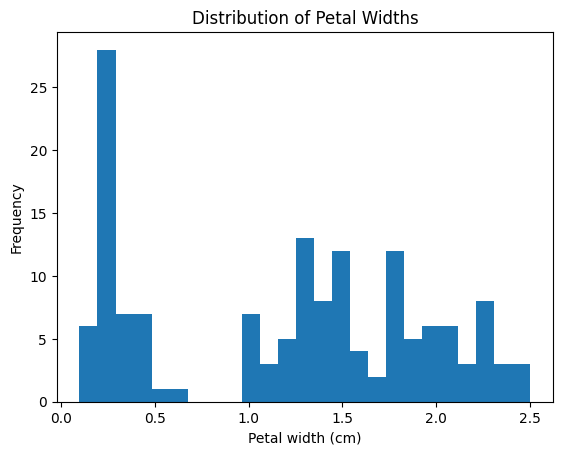

In [24]:
ax = plt.axes()
ax.hist(df.petal_width, bins=25);

ax.set(xlabel='Petal width (cm)',
       ylabel='Frequency',
       title='Distribution of Petal Widths');

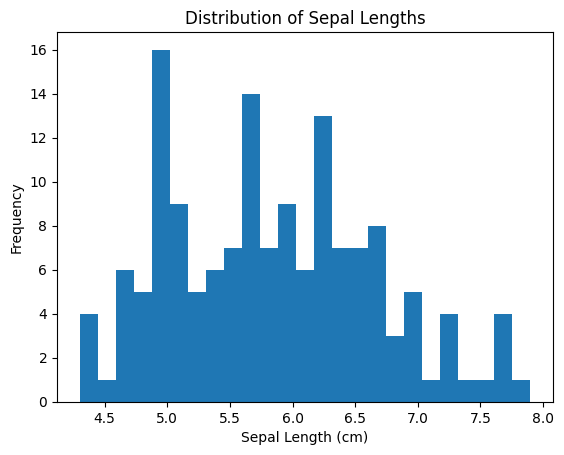

In [25]:
ax = plt.axes()
ax.hist(df.sepal_length, bins=25);

ax.set(xlabel='Sepal Length (cm)',
       ylabel='Frequency',
       title='Distribution of Sepal Lengths');

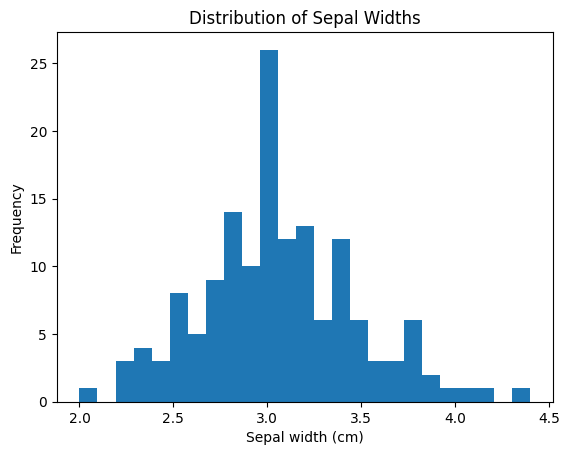

In [26]:
ax = plt.axes()
ax.hist(df.sepal_width, bins=25);

ax.set(xlabel='Sepal width (cm)',
       ylabel='Frequency',
       title='Distribution of Sepal Widths');

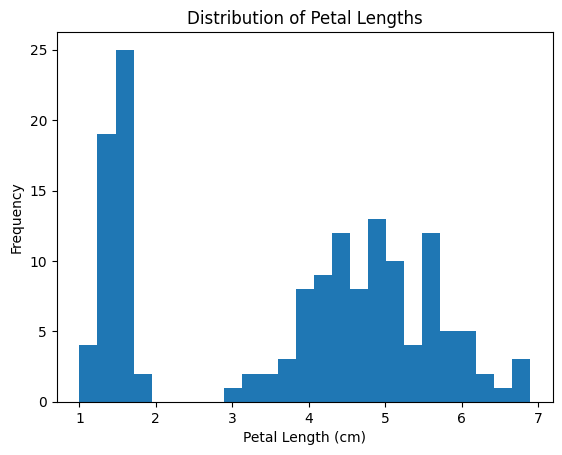

In [27]:
ax = df.petal_length.plot.hist(bins=25)

ax.set(xlabel='Petal Length (cm)',
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

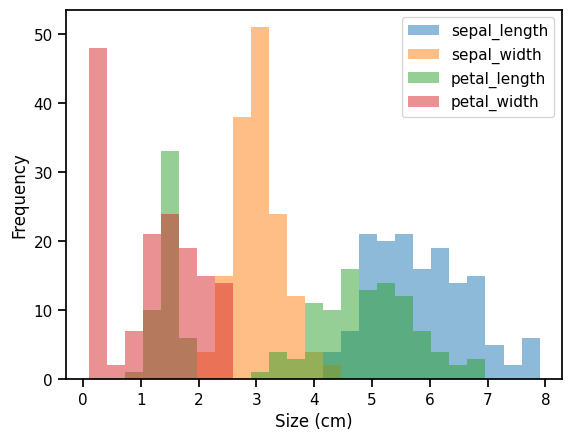

In [28]:
import seaborn as sns
sns.set_context('notebook')


ax = df.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

In [30]:
plot_data = (df
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,species,measurement,size
0,Iris-setosa,sepal_length,5.1
1,Iris-setosa,sepal_width,3.5
2,Iris-setosa,petal_length,1.4
3,Iris-setosa,petal_width,0.2
4,Iris-setosa,sepal_length,4.9


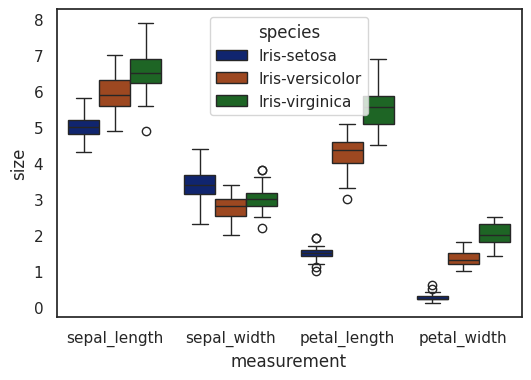

In [31]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size',
            hue='species', data=plot_data);

In [38]:
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()
print(iris.data)
k=3
model = KMeans(n_clusters = k)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

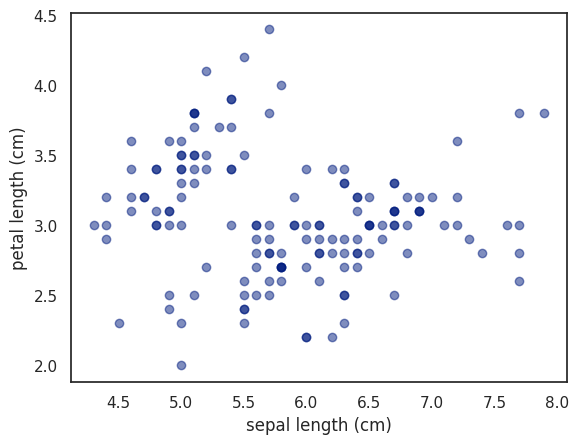

In [39]:
samples = iris.data
x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))
plt.scatter(x, y, alpha=0.5)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

plt.show()

In [40]:
#use .fit() method to fit the model to the samples
model.fit(samples)

KMeans(n_clusters=3)

In [41]:



# Use .predict() to determine the labels of samples
labels = model.predict(samples)
# Print the labels
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


# Train-test splits

In [42]:
data = df.copy()
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
from sklearn.model_selection import train_test_split

target = 'species'
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
# it shows 80% of data is split for training and 20% of the data goes to testing.
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Test Accuracy for Scikit-Learn model:', metrics.accuracy_score(y_test, y_pred)* 100,'%')

Test Accuracy for Scikit-Learn model: 93.33333333333333 %


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30

